In [1]:
import pandas as pd

In [20]:
#read the data from the file
data = pd.read_csv("dataset/data.csv")
#print(data.head())


In [21]:
#drop the rows with missing values
data = data.dropna()


In [22]:
#shuffle the data
data = data.sample(frac=1, random_state=42)
#print(data.head())

In [23]:
print(data.head())
print(data.shape)

                                                   URLs  \
1498  http://beforeitsnews.com/sports/2017/10/105-tr...   
2108  https://www.nytimes.com/2017/10/07/style/perso...   
1729  https://www.nytimes.com/2017/10/12/movies/the-...   
869   http://beforeitsnews.com/u-s-politics/2017/09/...   
3693  https://www.nytimes.com/2017/10/09/world/middl...   

                                               Headline  \
1498  10/5 TRS-PNC Park: Bucs Win in '71, '79; Lose ...   
2108            Whatever Happened to Just Being Type A?   
1729  Review: In ‘The Departure,’ Watching Over Thos...   
869   Ellen DeGeneres Says She Will Never Host Presi...   
3693  Yemen’s War Turns Children Into Young Brides a...   

                                                   Body  Label  
1498  Red Flag Warning: These California Wildfires A...      0  
2108  Meanwhile, Ms. Rubin gestated her eighth book....      1  
1729  Photo\nSad, tender and quietly moving, “The De...      1  
869   Shahzaib Elahi\nContribu

In [25]:
#importing nlp libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string
import re

In [26]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\duttvedaant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\duttvedaant\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\duttvedaant\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
# a set of stopwords
stop_words = set(stopwords.words('english'))


In [ ]:
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)  
    # Tokenize, convert to lowercase, and remove stopwords
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

In [30]:
data['Body'] = data['Body'].apply(preprocess_text)
print(data.head())

                                                   URLs  \
1498  http://beforeitsnews.com/sports/2017/10/105-tr...   
2108  https://www.nytimes.com/2017/10/07/style/perso...   
1729  https://www.nytimes.com/2017/10/12/movies/the-...   
869   http://beforeitsnews.com/u-s-politics/2017/09/...   
3693  https://www.nytimes.com/2017/10/09/world/middl...   

                                               Headline  \
1498  10/5 TRS-PNC Park: Bucs Win in '71, '79; Lose ...   
2108            Whatever Happened to Just Being Type A?   
1729  Review: In ‘The Departure,’ Watching Over Thos...   
869   Ellen DeGeneres Says She Will Never Host Presi...   
3693  Yemen’s War Turns Children Into Young Brides a...   

                                                   Body  Label  
1498  red flag warning california wildfires among de...      0  
2108  meanwhile ms rubin gestated eighth book four t...      1  
1729  photo sad tender quietly moving departure neve...      1  
869   shahzaib elahi contribut

In [ ]:
#converting text to matrix of tdf-idf features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(data['Body']).toarray()
y = data['Label']

#print(X)


[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.02909769 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.030381   0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [ ]:
#split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier()
#model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9874686716791979
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       417
           1       0.98      0.99      0.99       381

    accuracy                           0.99       798
   macro avg       0.99      0.99      0.99       798
weighted avg       0.99      0.99      0.99       798



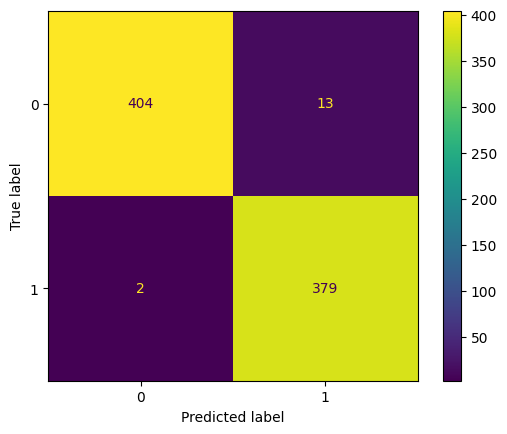

In [ ]:
#displaying a confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
